# Music Recommender 


### Business Understanding 

The company wants to increase sales in music. They want a recommendation system where we will predict what song a user likes or loves to listen

###  Data Undestanding

##### Data Source 
* Random generated data 
* The dataset has 3 columns "we will be using genre as our target "

In [22]:
#import libraries 
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("music.csv/music.csv")
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


### Data Preprocessing 

In [26]:
#check for missing values 
print(df.isna().sum())
#check for duplicated 
print(df.duplicated().sum())

age       0
gender    0
genre     0
dtype: int64
0


> This is dataset seems ok 

### Model 

In [4]:
# model variables 
X = df.drop(columns=['genre'])
y = df['genre']

In [5]:
#create model using an alogarithim 
#decision tress 
from sklearn.tree import DecisionTreeClassifier
#model 
model = DecisionTreeClassifier()
model.fit(X, y)

#predict for a 21 year old male and 21 old female what type of music they like 
prediction = model.predict([[21,1], [21,0]])
print(prediction) 

#Measuring accuracy of the model 
#split data in traing and test 
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

#now lets build a model for for the train and predict test data 
model_test = DecisionTreeClassifier()
model_test.fit(X_train, y_train)
pred_test = model_test.predict(X_test)
print(pred_test) 
#calculate the accuracy 
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, pred_test)
print("The Accuracy score is ", score)

['HipHop' 'Dance']
['Dance' 'Acoustic' 'Jazz' 'HipHop']
The Accuracy score is  1.0


In [6]:
"""# save and show file 
from sklearn.externals import joblib
joblib.dump(model, "music_Recommender") #gives an aray and a file in desktop
#load model 
model =joblib.load (model, "music_Recommender")
#predict for a 21 year old male and 21 old female what type of music they like 
prediction = model.predict([[21,1])
print(prediction) """

'# save and show file \nfrom sklearn.externals import joblib\njoblib.dump(model, "music_Recommender") #gives an aray and a file in desktop\n#load model \nmodel =joblib.load (model, "music_Recommender")\n#predict for a 21 year old male and 21 old female what type of music they like \nprediction = model.predict([[21,1])\nprint(prediction) '

In [7]:
# lets visualize with decision  tree 
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = ['gender', 'age'])

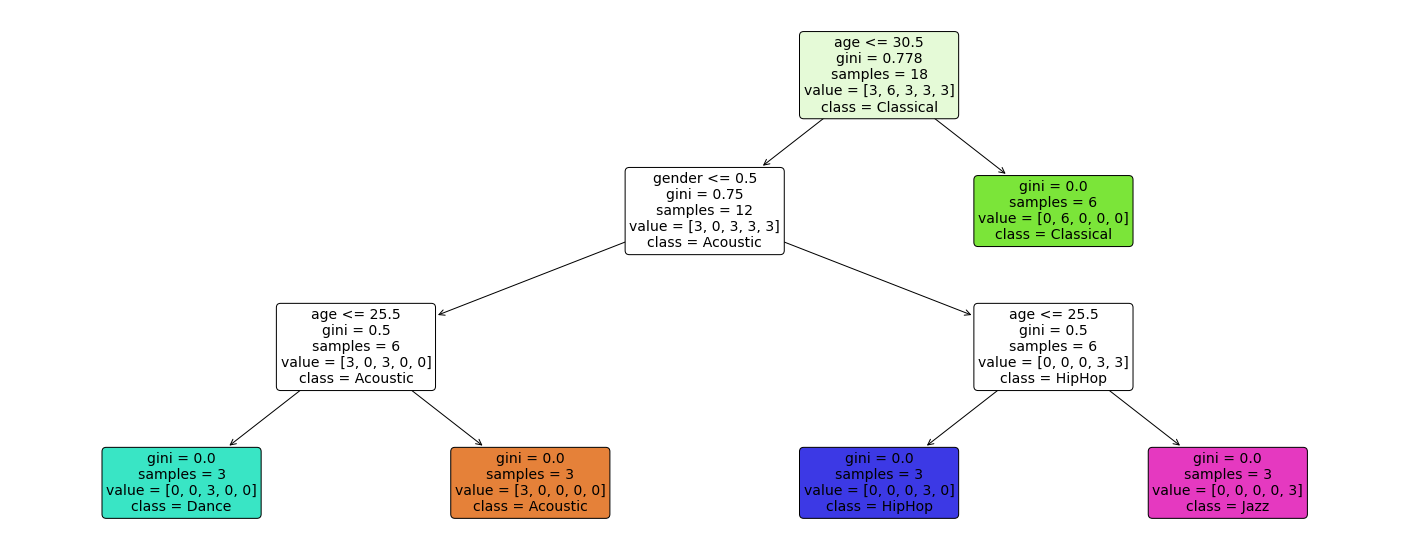

In [27]:
plt.figure(figsize=(25,10))
a = plot_tree(model, 
              feature_names=['age', 'gender'], 
              class_names=sorted(y.unique()), 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Conclusion 
* if a user age is greater than 30 recommender *classic*
* if the user is less than 30yrs it goes to gender 0.5 if its true check age if less than 25 yrs reccomend 
* *Dance* genre if greater than 25 *Acoustic* genre 
* Now on the otherside if gender greater than 1 go to age if age less than 25 recommend *Hiphop* else *jazz* genres 